# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


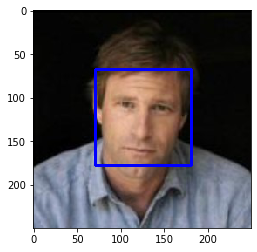

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_count=0
dog_files_count=0
for path in human_files_short:
    if face_detector(path):
        human_files_count+=1
for path in dog_files_short:
    if face_detector(path):
        dog_files_count+=1
# ideally, human_files_count should be 100 and dog_files_count should be 0
print(f'{round(human_files_count/len(human_files_short)*100,2)}% of human images have a detected human face.')
print(f'{round(dog_files_count/len(dog_files_short)*100,2)}% of dog images have a detected human face.')

96.0% of human images have a detected human face.
18.0% of dog images have a detected human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

face_cascade2 = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
# returns "True" if face is detected in image stored at img_path
def face_detector2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade2.detectMultiScale(gray)
    return len(faces) > 0

# Test face detector 2 which uses a different harrcascade pre-trained detector
human_files_count=0
dog_files_count=0
for path in human_files_short:
    if face_detector2(path):
        human_files_count+=1
for path in dog_files_short:
    if face_detector2(path):
        dog_files_count+=1
# ideally, human_files_count should be 100 and dog_files_count should be 0
print(f'{round(human_files_count/len(human_files_short)*100,2)}% of human images have a detected human face.')
print(f'{round(dog_files_count/len(dog_files_short)*100,2)}% of dog images have a detected human face.')

100.0% of human images have a detected human face.
59.0% of dog images have a detected human face.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# simple image transformation to tensor
transform = transforms.Compose([transforms.Resize(224), 
                                      transforms.ToTensor()])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # switch to evaluation
    VGG16.eval()
    img = transform(Image.open(img_path))
    batch = torch.unsqueeze(img,0)
    if use_cuda:
        batch = batch.cuda()
        
    #get index of highest value
    _, index = torch.max(VGG16(batch),1)
    return index.item()    

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return 151 <= index <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 0% of human files have a detected dog. 93% of do files have detected dog.


In [9]:
human_files_count=0
dog_files_count=0
for path in human_files_short:
    if dog_detector(path):
        human_files_count+=1
for path in dog_files_short:
    if dog_detector(path):
        dog_files_count+=1
# ideally, human_files_count should be 100 and dog_files_count should be 0
print(f'{round(human_files_count/len(human_files_short)*100,2)}% of human images have a detected dog face.')
print(f'{round(dog_files_count/len(dog_files_short)*100,2)}% of dog images have a detected dog face.')

0.0% of human images have a detected dog face.
93.0% of dog images have a detected dog face.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

alexnet = models.alexnet(pretrained=True)
if use_cuda:
    alexnet = alexnet.cuda()

def alexnet_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # switch to evaluation
    alexnet.eval()
    img = transform(Image.open(img_path))
    batch = torch.unsqueeze(img,0)
    if use_cuda:
        batch = batch.cuda()
        
    #get index of highest value
    _, index = torch.max(alexnet(batch),1)
    return index.item()    

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector2(img_path):
    ## TODO: Complete the function.
    index = alexnet_predict(img_path)
    return 151 <= index <= 268

In [12]:
human_files_count=0
dog_files_count=0
for path in human_files_short:
    if dog_detector2(path):
        human_files_count+=1
for path in dog_files_short:
    if dog_detector2(path):
        dog_files_count+=1
# ideally, human_files_count should be 100 and dog_files_count should be 0
print(f'{round(human_files_count/len(human_files_short)*100,2)}% of human images have a detected dog face.')
print(f'{round(dog_files_count/len(dog_files_short)*100,2)}% of dog images have a detected dog face.')

0.0% of human images have a detected dog face.
71.0% of dog images have a detected dog face.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# simple image transformation to tensor
complex_transform = transforms.Compose([transforms.Resize(size=256),
                                        transforms.CenterCrop(224),
                                        transforms.RandomRotation(degrees=15),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor()])

# we do not need to apply to the evaluation and the validation data as those should mimic real life as much as possible.
# As such, only do a centercrop
simple_transform = transforms.Compose([transforms.Resize(size=256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor()])

# define training and test data directories
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')


train_data = datasets.ImageFolder(train_dir, transform=complex_transform)
test_data = datasets.ImageFolder(test_dir, transform=simple_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=simple_transform)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# prepare data loaders (combine dataset and sampler)
training_loader   = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validation_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)
testing_loader    = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers)

loaders_scratch = {'train': training_loader, 'valid' : validation_loader, 'test': testing_loader}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

I resized by first creating a image of 256 by 256, then centre cropping the image to 224 by 244. I picked the size 224 by 224 because I know that VGG16 expects 224-dim square images as input and would like to stick to that.

I decided to augment the dataset by only using rotation and horizontal flip to keep mostly the integrity of dog heads, but still want the machine to learn how to pick up dog images for different angles, and facing different sides.

As suggested, augmentation should only be done on the training set. For test and validation, I resized to ensure the image is 224 by 244 as well.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # want to create something that is similiar to the VGG16 network
        # 224 by 224
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        # 112 by 112
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        # 56 by 56
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        # 28 by 28
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        #After these layers, 2 more maxpooling to make image 7 by 7 before fc layers
        
        # use a maxpool that reduces size by half
        self.maxpool = nn.MaxPool2d(2,2)
        # 2 hidden layers before output layer
        # 1st hidden layer takes in 56 by 56 by 64 image
        self.fc1 = nn.Linear(7*7*64, 2000)
        self.fc2 = nn.Linear(2000, 1000)
        
        # define a drop out to ensure no overfitting and generalization of model
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        ## Define forward behavior. Note: first layer is change in depth, no change in size as per VGG16
        x=F.relu(self.conv1(x))
        x=self.maxpool(F.relu(self.conv2(x)))
        x=self.maxpool(F.relu(self.conv3(x)))
        x=self.maxpool(F.relu(self.conv4(x)))
        x=self.maxpool(F.relu(x))
        x=self.maxpool(F.relu(x))
        
        # flatten for fc linear hidden layers
        x = x.view(-1, 7*7*64)
                    
        # add dropouts at each hidden layer
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I decided to use dropout to ensure no overfitting, and use a similiar architecture as the VGG16 model, mainly to teach myself to understand it better, and learn to replicate existing setups. In the setup, there is maxpooling so that the image eventually becomes 7 by 7. However, I decided to use much less depth compared to the actual VGG16 to ensure training performance reasonable and not take too long to train.

    Step 1: increase filters from 3 to 8
    Step 2: increase filter from 8 to 16 and half the image size to 112 by 112
    Step 3: increase filter from 16 to 32 and half the image size to 56 by 56
    Step 3: increase filter from 32 to 64 and half the image size to 28 by 28
    Step 4: reduce image to 14 by 14, no change in depth
    Step 5: reduce image to 7 by 7, no change in depth
    Step 6: drop out of 20% before fully connected layer of 2000 nodes
    Step 6: drop out of 20% before output layer
    

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### Hyperparameters for use when doing training ###
learning_rate=0.05
epochs = 20

# softmax loss function should be cross entropy loss
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)

    # return trained model
    return model

# train the model
model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 5.562592 	Validation Loss: 5.032806
Validation loss decreased (inf --> 5.032806).  Saving model ...
Epoch: 2 	Training Loss: 5.043870 	Validation Loss: 4.984975
Validation loss decreased (5.032806 --> 4.984975).  Saving model ...
Epoch: 3 	Training Loss: 5.007347 	Validation Loss: 4.969700
Validation loss decreased (4.984975 --> 4.969700).  Saving model ...
Epoch: 4 	Training Loss: 4.983133 	Validation Loss: 4.946426
Validation loss decreased (4.969700 --> 4.946426).  Saving model ...
Epoch: 5 	Training Loss: 4.971100 	Validation Loss: 4.928931
Validation loss decreased (4.946426 --> 4.928931).  Saving model ...
Epoch: 6 	Training Loss: 4.960915 	Validation Loss: 4.931438
Epoch: 7 	Training Loss: 4.955216 	Validation Loss: 4.919360
Validation loss decreased (4.928931 --> 4.919360).  Saving model ...
Epoch: 8 	Training Loss: 4.950444 	Validation Loss: 4.905090
Validation loss decreased (4.919360 --> 4.905090).  Saving model ...
Epoch: 9 	Training Loss: 4.939373 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.978136


Test Accuracy: 11% (93/835)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [18]:
## TODO: Specify data loaders
# using same loaders
loaders_transfer = {'train': training_loader, 'valid' : validation_loader, 'test': testing_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet50(pretrained=True)
# freeze training for features
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133, bias=True)

# allow training for fc layers
fc_parameters = model_transfer.fc.parameters()
for param in fc_parameters:
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

In [20]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I decided to just use the resnet50 model. As it already has the necessary training to identify all the dog breeds and good image processing in the feature layers. I will freeze the training of the feature layers, but allow training for the final fc layer to train for dog classification only. Note that I changed the final fc layer to output 133 classifications as there are 133 breeds in the dog images.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 47.653965 	Validation Loss: 21.695951
Validation loss decreased (inf --> 21.695951).  Saving model ...
Epoch: 2 	Training Loss: 19.430922 	Validation Loss: 17.688887
Validation loss decreased (21.695951 --> 17.688887).  Saving model ...
Epoch: 3 	Training Loss: 19.216089 	Validation Loss: 20.728994
Epoch: 4 	Training Loss: 17.215380 	Validation Loss: 19.946579
Epoch: 5 	Training Loss: 16.433538 	Validation Loss: 24.519852
Epoch: 6 	Training Loss: 16.910549 	Validation Loss: 21.629978
Epoch: 7 	Training Loss: 16.528147 	Validation Loss: 21.640121
Epoch: 8 	Training Loss: 16.102053 	Validation Loss: 24.171326
Epoch: 9 	Training Loss: 15.627538 	Validation Loss: 23.012423
Epoch: 10 	Training Loss: 14.967708 	Validation Loss: 22.221996
Epoch: 11 	Training Loss: 15.038778 	Validation Loss: 30.940165
Epoch: 12 	Training Loss: 15.480069 	Validation Loss: 26.589785
Epoch: 13 	Training Loss: 14.809205 	Validation Loss: 30.023268
Epoch: 14 	Training Loss: 14.320663 	Vali

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 18.482555


Test Accuracy: 65% (548/835)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    model_transfer.eval()
    img = transform(image)
    batch = torch.unsqueeze(img,0)
    if use_cuda:
        batch = batch.cuda()
        
    #get index of highest value
    idx = torch.argmax(model_transfer(batch),1)
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print("Dogs Detected!\nDog breed is likely a {0}".format(prediction))  
    elif face_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print("Human!\nIf you were a dog, you would be a {0}".format(prediction))
    else:
        print("Error. Can't detect dog or human.")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Ouput is 4 correct out of 6. This is about 66%, which is around the accuracy of the dog breed classification. However, I thought the human and dog detectors should be quite good, meaning I should not see Error that often. However, in these 6 images, 2 were identified as neither human nor dog, which is worse than expectation. However, I would say the dog breed classifier is working rather well. 3 points of improvement:
    
    1) Continue to train the model with more epochs. This is because at every epoch, the model was still improving, which meant it could have been even better.
    2) Use better models for the dog/human detector as resnet seems to be quite a good model.
    3) Use transfer learning and train a dog/human classifier instead of using the stock models. This is because the models have over 1000 classifications. However, the man task is just to classify whether it is a human or a dog. As such, training the model for these two classifications only would likely yield much better accuracy as opposed to something with 1000 classificaitons.

lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg


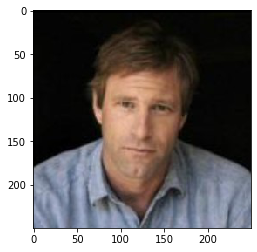

Human!
If you were a dog, you would be a Chinese crested
lfw\Aaron_Guiel\Aaron_Guiel_0001.jpg


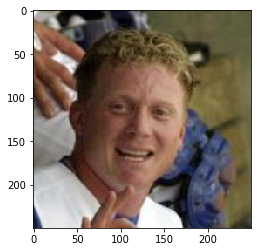

Human!
If you were a dog, you would be a Bull terrier
lfw\Aaron_Patterson\Aaron_Patterson_0001.jpg


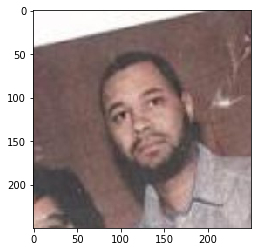

Error. Can't detect dog or human.
dogImages\test\001.Affenpinscher\Affenpinscher_00003.jpg


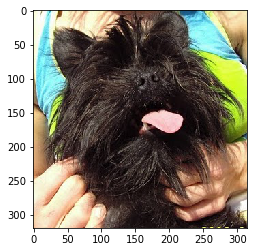

Error. Can't detect dog or human.
dogImages\test\001.Affenpinscher\Affenpinscher_00023.jpg


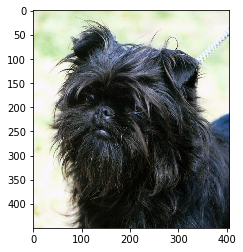

Dogs Detected!
Dog breed is likely a Affenpinscher
dogImages\test\001.Affenpinscher\Affenpinscher_00036.jpg


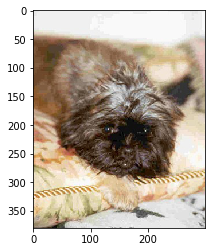

Dogs Detected!
Dog breed is likely a Affenpinscher


In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    print(file)
    run_app(file)

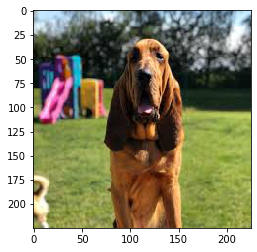

Dogs Detected!
Dog breed is likely a Bloodhound


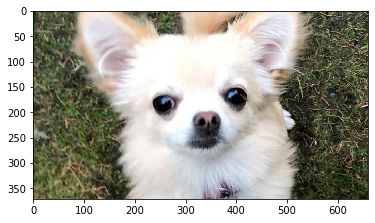

Dogs Detected!
Dog breed is likely a Chinese crested


In [28]:
# test my own image of dog breeds
run_app("bloodhound.jpg") # able to detect
run_app("chihuahua.jpg") # detected dog, wrong breed